# Factors Affecting the Quality of Red Wine

## Introduction

The objective of this project is to find the factor could affect the quelity of wine with the 2009 wine quality data from the north of Portugalusing multiple linear regression. We use the Statsmodels and Patsy modules for this task with Python. The dataset was sourced from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Wine+Quality (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis., 2009). This report is organized as follows:

- [Overview](#Overview) section describing the dataset used and the features in this dataset.
- [Data preparation](#Data_preparation) section making sure the data is clean.
- [Data exploration](#Data-exploration) section explores dataset features and their relationships.
- [Statistical Modeling and Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation)
- [Summary and Conclusions](#Summary-and-Conclusions) section summarizing our work and presenting our findings.


## Overview

### Data Source

The data source is from Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez.
There are three datasets `winequality-red.csv` `winequality-white.csv` and `winequality.names`. First two are related to red and white vinho verde wine samples and based on physicochemical tests. The `winequality.names` countains the deatils of the variables.Our project will only use `winequality-red.csv` and `winequality.names` to reach our goal.

Due to privacy and logistic issues, there will not be including grape types,wine brand or wine selling price etc.The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. 
There are 1599 instances from red wine and 4898 instances from white wine. Both of them consist of 11 descriptive features. 

For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].

### Project Objective

Our goal is to see how we can predict a wine quality within an acceptable margin of error using multiple linear regression with affects

### Target Feature

Our target feature is **`quality`**,which is continuous varible.

### Descriptive Features

- **`fixed acidity `**most acids involved with wine or fixed or nonvolatile &nbsp; <b>continuous varible</b>
- **`volatile acidity `**the amount of acetic acid in wine&nbsp; <b>continuous varible</b>
- **`citric acid `**found in small quantities, citric acid can add 'freshness' and flavor to wines &nbsp; <b>continuous varible</b>
- **`residual sugar `**the amount of sugar remaining after fermentation stops &nbsp; <b>continuous varible</b>
- **`chlorides `**the amount of salt in the wine &nbsp; <b>continuous varible</b>
- **`free sulfur dioxide`**the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion &nbsp; <b>continuous varible</b>
- **`total sulfur dioxide`**amount of free and bound forms of S02 &nbsp; <b>continuous varible</b>
- **`density `**the density of water is close to that of water depending on the percent alcohol and sugar content &nbsp; <b>continuous varible</b>
- **`pH `**describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic) &nbsp; <b>continuous varible</b>
- **`sulphates`**a wine additive which can contribute to sulfur dioxide gas (S02) levels &nbsp; <b>continuous varible</b>
- **`alcohol`**the percent alcohol content of the wine &nbsp; <b>continuous varible</b>
- **`quality`**output variable (based on sensory data, score between 0 and 10) &nbsp; <b>continuous varible</b>
 


## Data preparation

### Preliminaries

In [86]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings('ignore')

In [87]:
wine_dataset = pd.read_csv('winequality-red.csv')
wine_dataset.head()
print(f'There are {wine_dataset.shape[0]} rows and {wine_dataset.shape[1]} columns')

There are 1599 rows and 12 columns


In [88]:
# Display randomly selected 10 rows
wine_dataset.sample(10, random_state=999)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1166,9.9,0.540,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
1079,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7
916,5.3,0.715,0.19,1.50,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5
1582,6.1,0.715,0.10,2.60,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
442,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5
401,7.7,0.260,0.30,1.70,0.059,20.0,38.0,0.99490,3.29,0.47,10.8,6
1376,8.2,0.885,0.20,1.40,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5


In [89]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Cleaning

In [90]:
print(f"Check duplications: ")
wine_dataset.duplicated()

Check duplications: 


0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [91]:
print(f"Number of duplications ")
wine_dataset.duplicated().sum()

Number of duplications 


240

In [92]:
print(f"Remove duplicated values and new dataset called 'df' ")
winedata = wine_dataset.drop_duplicates(inplace=False)

Remove duplicated values and new dataset called 'df' 


In [93]:
print(f"The shape of the data after droping duplication {winedata.shape}")

The shape of the data after droping duplication (1359, 12)


In [94]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
winedata.describe(include = np.number).round(3)  # numerical features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000,1359.000
mean,8.311,0.529,0.272,2.523,0.088,15.893,46.826,0.997,3.310,0.659,10.432,5.623
std,1.737,0.183,0.196,1.352,0.049,10.447,33.409,0.002,0.155,0.171,1.082,0.824
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.430,2.600,0.091,21.000,63.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [96]:
print(f"Number of data from quanlity ")
winedata['quality'].value_counts()

Number of data from quanlity 


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

### Checking for Missing Values

In [97]:
print(f"Check if there is any null values.\n")
winedata.isnull().sum()

Check if there is any null values.



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Check data types

In [98]:
print(f"Data types:")
winedata.dtypes

Data types:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Summary Statistics

In [172]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
winedata.describe(include=['int64','float64'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data exploration

Text(0.5, 1.0, 'Figure: Countplot of Quality')

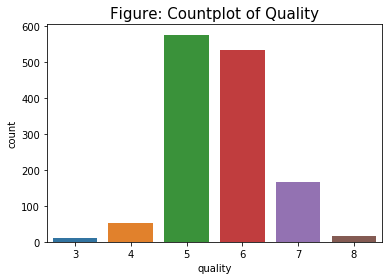

In [138]:
sns.countplot(x= 'quality', data = winedata).set_title('Figure: Countplot of Quality', fontsize = 15)

Text(0.5, 1.0, 'Figure: Boxplot of Quality')

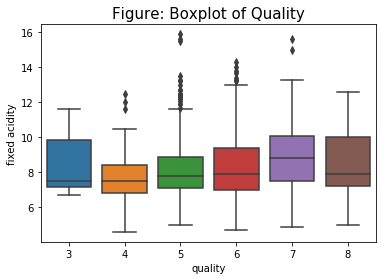

In [137]:
sns.boxplot(winedata['quality'],winedata['fixed acidity']).set_title('Figure: Boxplot of Quality', fontsize = 15)


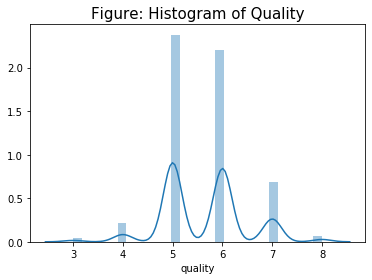

In [101]:
sns.distplot(winedata['quality'], kde = True).set_title('Figure: Histogram of Quality', fontsize = 15)
plt.show();


#### Analysis of pH in different type of wine

In [139]:
rate = ['good','bad']
condition = [(winedata['quality'] > 6),
            (winedata['quality'] < 5)]
winedata['rate'] = np.select(condition, rate, default='average')
winedata.rate.value_counts()

average    1112
good        184
bad          63
Name: rate, dtype: int64

sns.swarmplot(x = "rate", y="pH", data = winedata)

#### Analysis of Residual Sugar and Alcohol in different type of wine

These three 3 figures below are lmplots of residual sugar by alcohol.

Text(0.5, 1, 'Figure : Lmplots of residual sugar by alcohol')

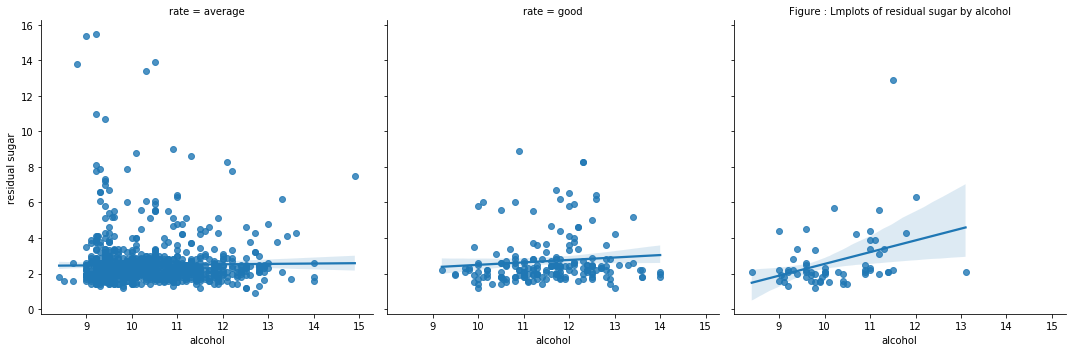

In [134]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rate", data = winedata)

Above diagrams are lmplots of residual sugar by alcohol.

#### Anylization of quality rate and sulfur dioxide

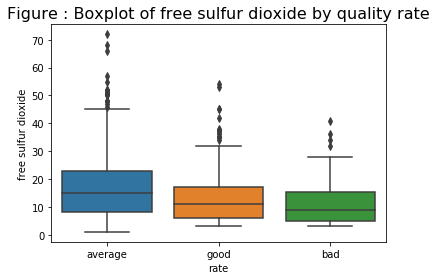

In [131]:
sns.boxplot(winedata['rate'],winedata['free sulfur dioxide']);
plt.title('Figure : Boxplot of free sulfur dioxide by quality rate', fontsize = 16)
plt.show();

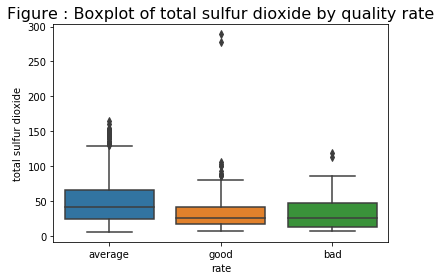

In [132]:
sns.boxplot(winedata['rate'],winedata['total sulfur dioxide']);
plt.title('Figure : Boxplot of total sulfur dioxide by quality rate', fontsize = 16)
plt.show();

Text(0.5, 1, 'Figure :  Releationship between alcohol and quality')

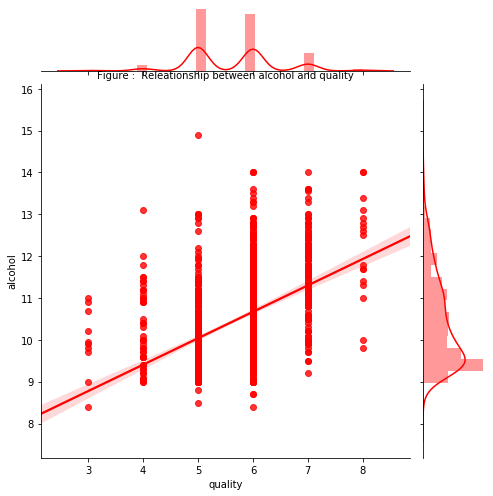

In [135]:
sns.jointplot(data=winedata,x = "quality",y = "alcohol",kind = "reg",truncate=False,color = "r",height = 7)
plt.title('Figure :  Releationship between alcohol and quality', fontsize = 10)

Text(0.5, 1, 'Figure :  Heatmap of red wine data')

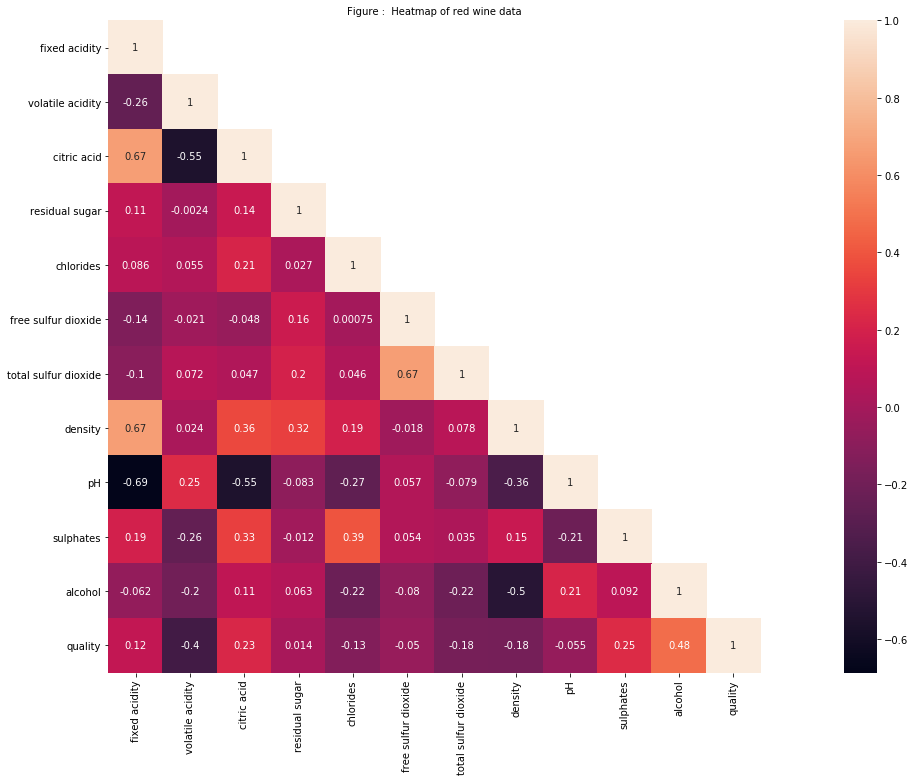

In [140]:
cor_mat= winedata.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
plt.title('Figure :  Heatmap of red wine data', fontsize = 10)

## Statistical Modeling and Performance Evaluation

### Mean of red wine quality

Red Wine Mean Rating: 5.6232523914643116


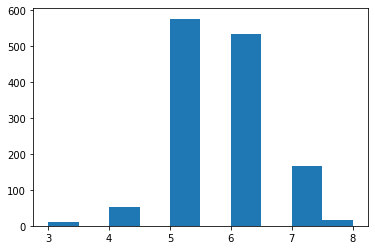

In [151]:
plt.hist(winedata['quality'])

print('Red Wine Mean Rating:', winedata['quality'].mean())


From the above diagram, we cann see the mean quality of red wine is 5.62. There are no wines having quality larger than 8 or less than 3. Most of red wine's qualities from the dataset are between 5-6. Therefore, we can say that most red wines have the average qualitiy. 

### Model building

In [110]:
X = winedata.iloc[:,:11]
y = winedata.iloc[:,11]

In [157]:
# Multiple Linear Regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
print(f'At this step, we built the full model and define the prdict values for it on multiple linear regression.')

At this step, we built the full model and define the prdict values for it on multiple linear regression.


Then we define a new data frame for actual quality vs. predicted quality and the residuals for the full model. We will use this data frame when plotting predicted values and the regression residuals.

In [158]:
residuals = pd.DataFrame({'actual': winedata['quality'], 
                            'predicted': model.fittedvalues, 
                            'residual': model.resid})
residuals.head(10)

,actual,predicted,residual
0,5,5.015898,-0.015898
1,5,5.115008,-0.115008
2,5,5.198882,-0.198882
3,6,5.672657,0.327343
5,5,5.053299,-0.053299
6,5,5.091355,-0.091355
7,7,5.290987,1.709013
8,7,5.304178,1.695822
9,5,5.665328,-0.665328
10,5,5.059471,-0.059471


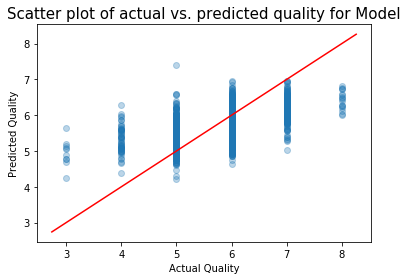

In [113]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals['actual'], residuals['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Quality');
plt.ylabel('Predicted Quality');
plt.title('Scatter plot of actual vs. predicted quality for Model', fontsize=15);
plt.show();

From the above figure, we observe that the model never produces a prediction above 7.5 even we had red wines that their qualities are 8.
### Full Model Diagostics Check

We will check the Full Model Diagnostics.

We want to check whether there are indications of violations of the regression assumptions, which are :

linearity of the relationship between target variable and the independent variables

normality of the residual distribution

statistical independence of the residuals

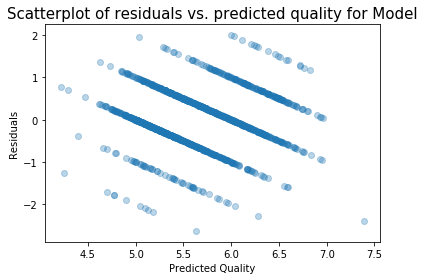

In [114]:
plt.scatter(residuals['predicted'], residuals['residual'], alpha=0.3);
plt.xlabel('Predicted Quality');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted quality for Model', fontsize=15)
plt.show();

From the above figure of residuals vs predicted quality,the residuals exhibit a banding pattern. It indicates that the constant variability assumption of linear regression might not be suitable for this case.

And the below figure is about residuals vs actual quality.

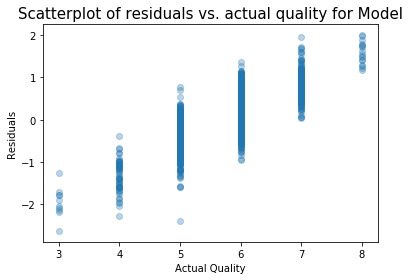

In [115]:
plt.scatter(residuals['actual'], residuals['residual'], alpha=0.3);
plt.xlabel('Actual Quality');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual quality for Model', fontsize=15)
plt.show();

From the above figure, we can see the model underestimates higher quality wine. By comparing the previous figure, for the qualities larger than 7,the model predicts significantly lower qualities.

The figures below are the histogram of actual vs. predicted quality on the same plot. 

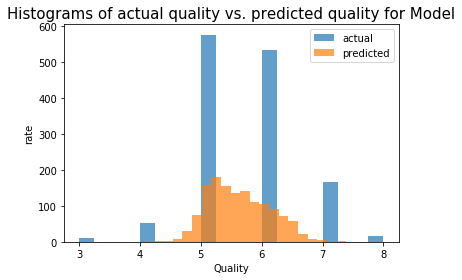

In [162]:
plt.hist(residuals['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Quality');
plt.ylabel('rate');
plt.title('Histograms of actual quality vs. predicted quality for Model', fontsize=15);
plt.legend()
plt.show()


From the above figure, the model's predictions are highly clustered around 5-6.

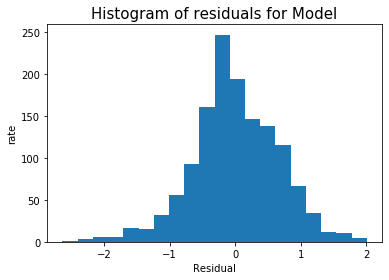

In [117]:
plt.hist(residuals['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('rate');
plt.title('Histogram of residuals for Model', fontsize=15);
plt.show();

From the above figure, the histogram of residuals is slightly left-skewed and looks like symmetric. 
It seems the normality assumption of linear regression is not significantly violated in this particular case.

## Summary and Conclusions


Our diagnostic checking is with residual scatter plots, rather than being random and centered around 0. And the residuals exhibit a banding pattern.

In particular, for those qualities lower than 5, the model predicts much higher quality. In the oterr hand, for those qualites above 7, the model predicts significantly lower quality.

## References

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.(2009) UCI Machine Learning Repository (online) available at http://archive.ics.uci.edu/ml/datasets/Wine+Quality . [assessed 2020-10-23]
-  Vural Aksakalli Imran Ture,(2020) Predicting Age in Census Data(online) available at https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb. [assessed 2020-10-10]